In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset CSV file
df = pd.read_csv('all_month.csv')  

# Print columns to confirm structure 
print("Columns in dataset:", df.columns)

# Convert the 'time' column to datetime format and create a new 'Date' column
df['Date'] = pd.to_datetime(df['time'])

Columns in dataset: Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')


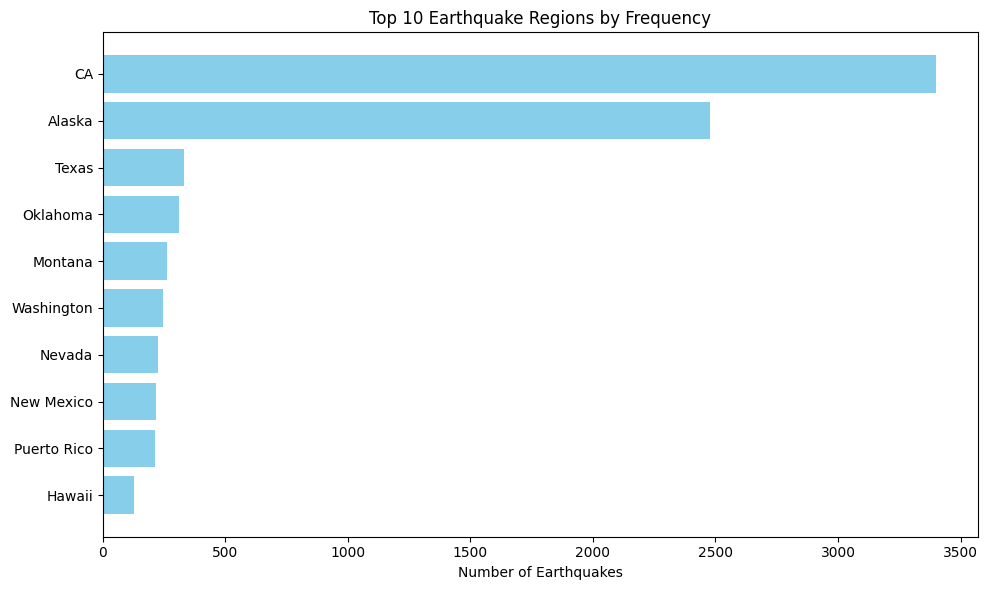

In [ ]:
# ------------------------------
# 1) Bar Graph: Top 10 regions by earthquake frequency
# ------------------------------
# We'll extract the location name from the 'place' column

# Some place values contain extra details, so let's simplify by extracting the part after the comma if present
df['Region'] = df['place'].apply(lambda x: x.split(',')[-1].strip() if pd.notnull(x) else 'Unknown')

# Count earthquakes by Region and select top 10
top_regions = df['Region'].value_counts().head(10)

plt.figure(figsize=(10,6))
plt.barh(top_regions.index[::-1], top_regions.values[::-1], color='skyblue')
plt.xlabel('Number of Earthquakes')
plt.title('Top 10 Earthquake Regions by Frequency')
plt.tight_layout()
plt.show()


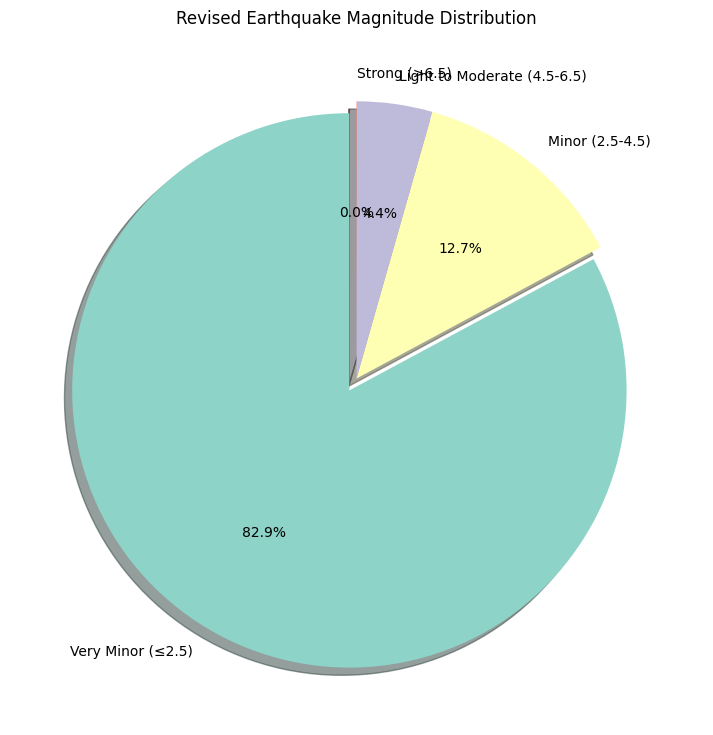

In [12]:
# ------------------------------
# 2) Pie Chart: Earthquake Magnitude Categories (Revised)
# ------------------------------
# Define updated magnitude categories with slightly different bins
bins = [0, 2.5, 4.5, 6.5, 10]
labels = ['Very Minor (≤2.5)', 'Minor (2.5-4.5)', 'Light to Moderate (4.5-6.5)', 'Strong (>6.5)']

# Assign categories based on magnitude
df['MagCategory'] = pd.cut(df['mag'], bins=bins, labels=labels, include_lowest=True)

# Count earthquakes in each category and sort by bin order
mag_counts = df['MagCategory'].value_counts().reindex(labels)

# Create explode list to slightly separate the largest slice for emphasis
explode = [0.05 if count == mag_counts.max() else 0 for count in mag_counts]

plt.figure(figsize=(9,9))
plt.pie(
    mag_counts,
    labels=mag_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    shadow=True,
    colors=['#8dd3c7', '#ffffb3', '#bebada', '#fb8072']
)
plt.title('Revised Earthquake Magnitude Distribution')
plt.show()

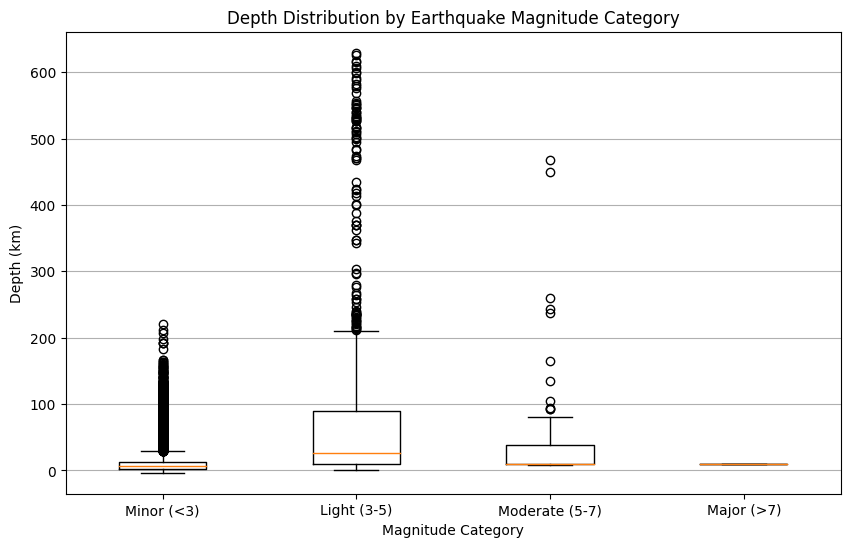

In [6]:
# ------------------------------
# 3) Box Plot: Distribution of earthquake depth by magnitude category
# ------------------------------
plt.figure(figsize=(10,6))
# Prepare depth data for each magnitude category
data_to_plot = [df[df['MagCategory'] == cat]['depth'].dropna() for cat in labels]

plt.boxplot(data_to_plot, labels=labels)
plt.xlabel('Magnitude Category')
plt.ylabel('Depth (km)')
plt.title('Depth Distribution by Earthquake Magnitude Category')
plt.grid(axis='y')
plt.show()

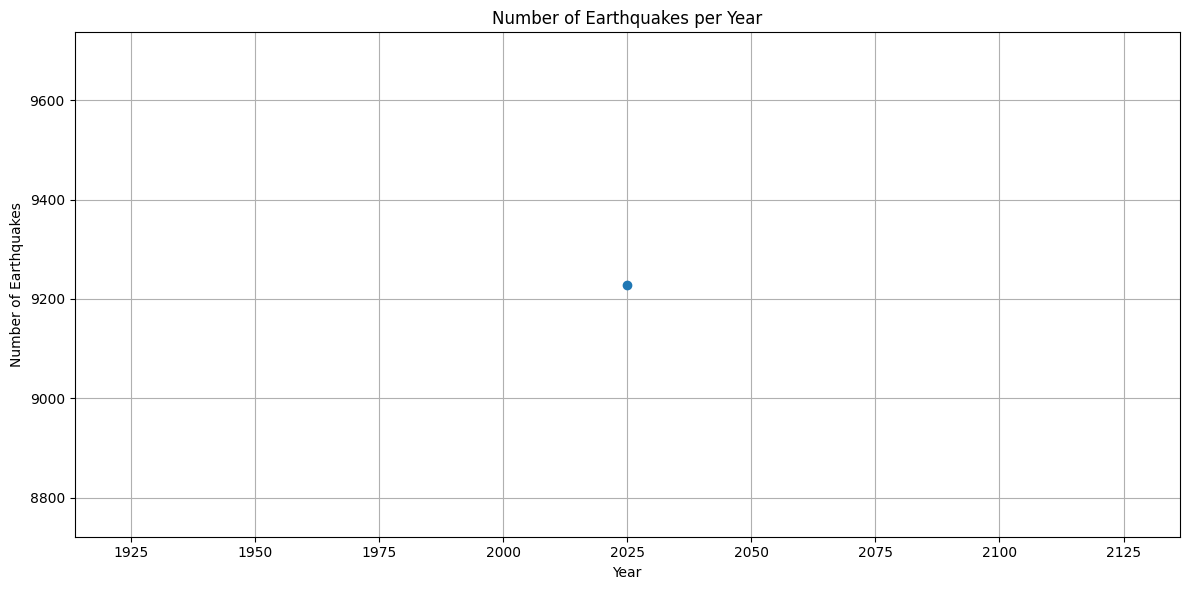

In [7]:
# ------------------------------
# 4) Line Chart: Number of earthquakes per year
# ------------------------------
# Extract year from 'Date' column
df['Year'] = df['Date'].dt.year

# Count earthquakes per year
yearly_counts = df.groupby('Year').size()

plt.figure(figsize=(12,6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.title('Number of Earthquakes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.grid(True)
plt.tight_layout()
plt.show()

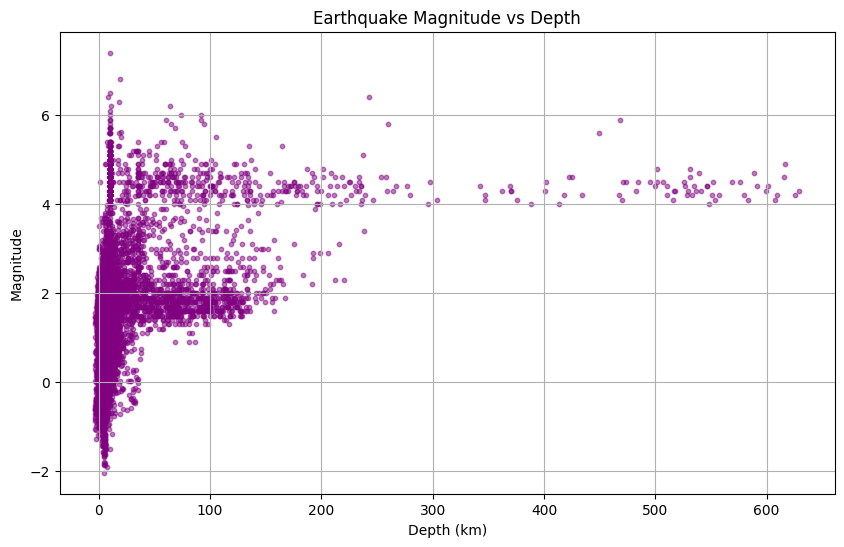

In [8]:
# ------------------------------
# 5) Scatter Plot: Relationship between earthquake depth and magnitude
# ------------------------------
plt.figure(figsize=(10,6))
plt.scatter(df['depth'], df['mag'], alpha=0.5, s=10, color='purple')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.title('Earthquake Magnitude vs Depth')
plt.grid(True)
plt.show()